In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

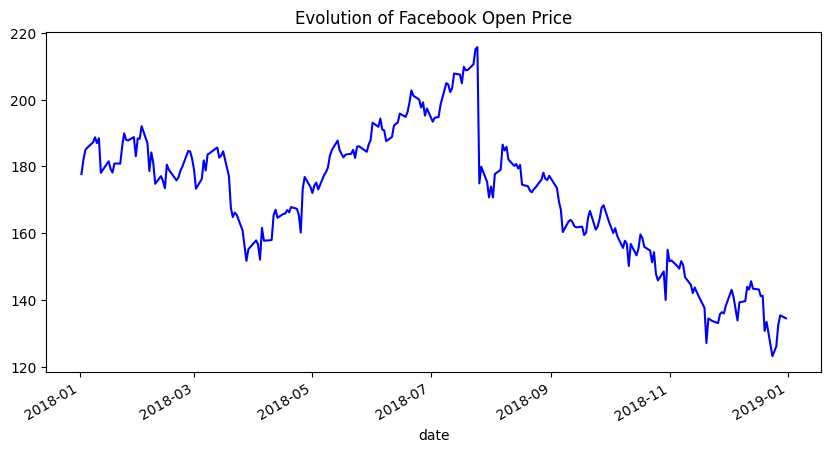

In [3]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

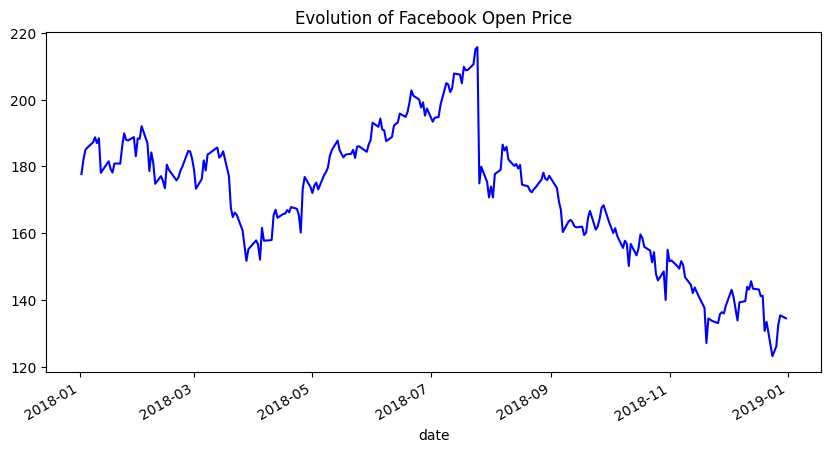

In [4]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

C:\Users\sxf\AppData\Local\Temp\ipykernel_110024\2558019465.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


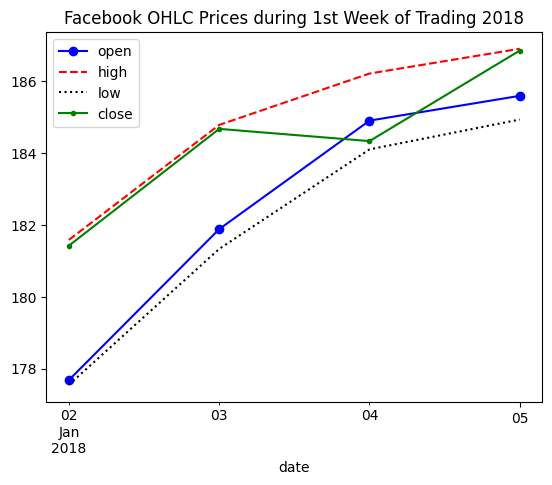

In [5]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

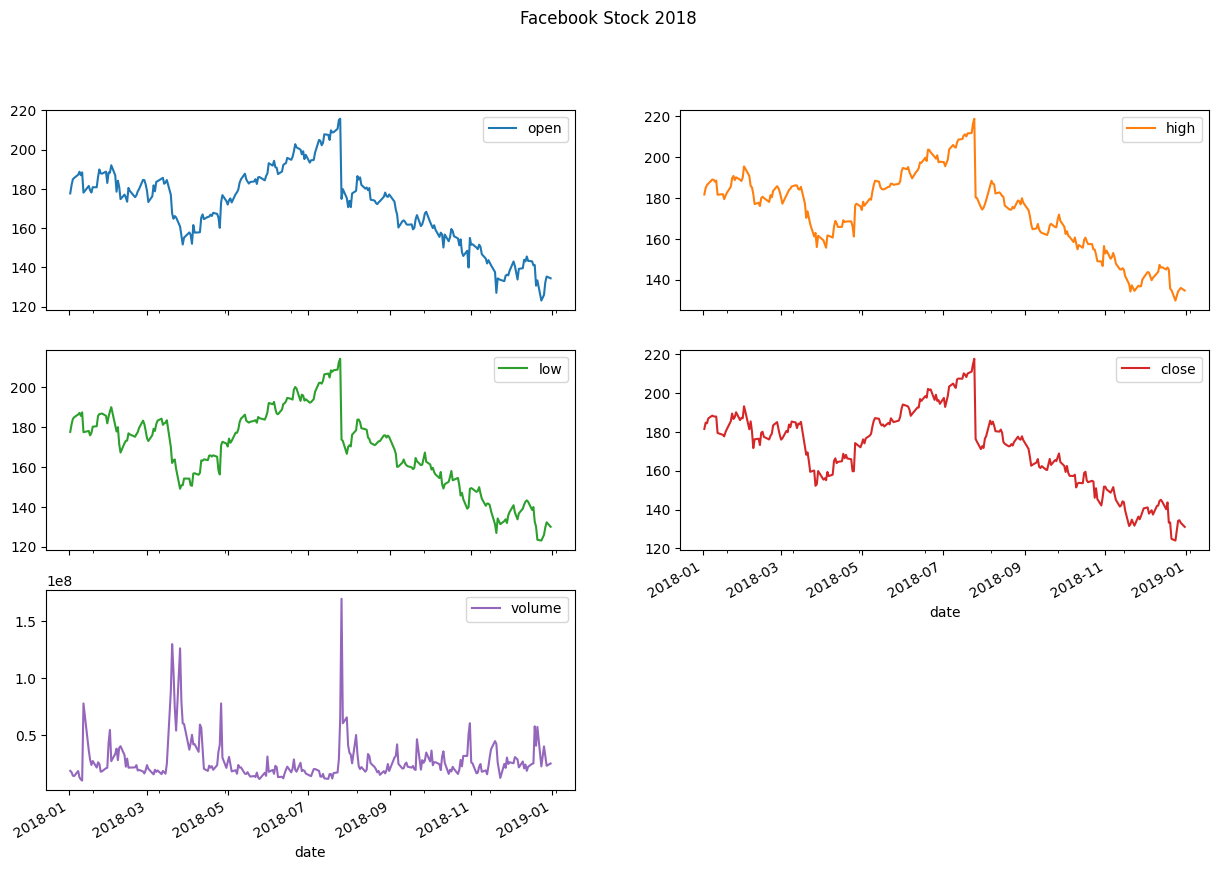

In [6]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

In [7]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

<Axes: xlabel='date'>

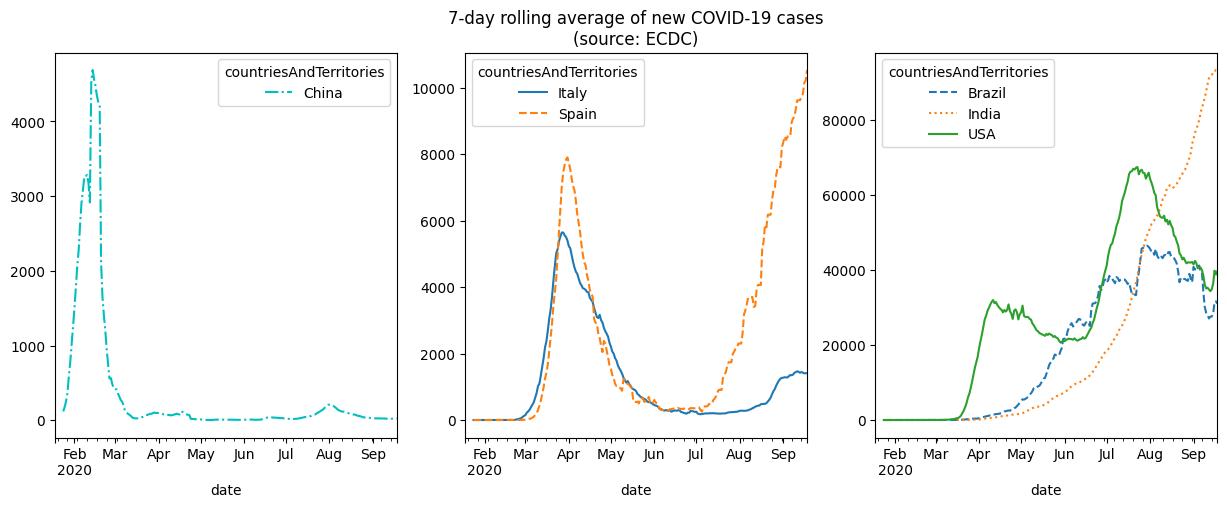

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

<Axes: title={'center': '7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

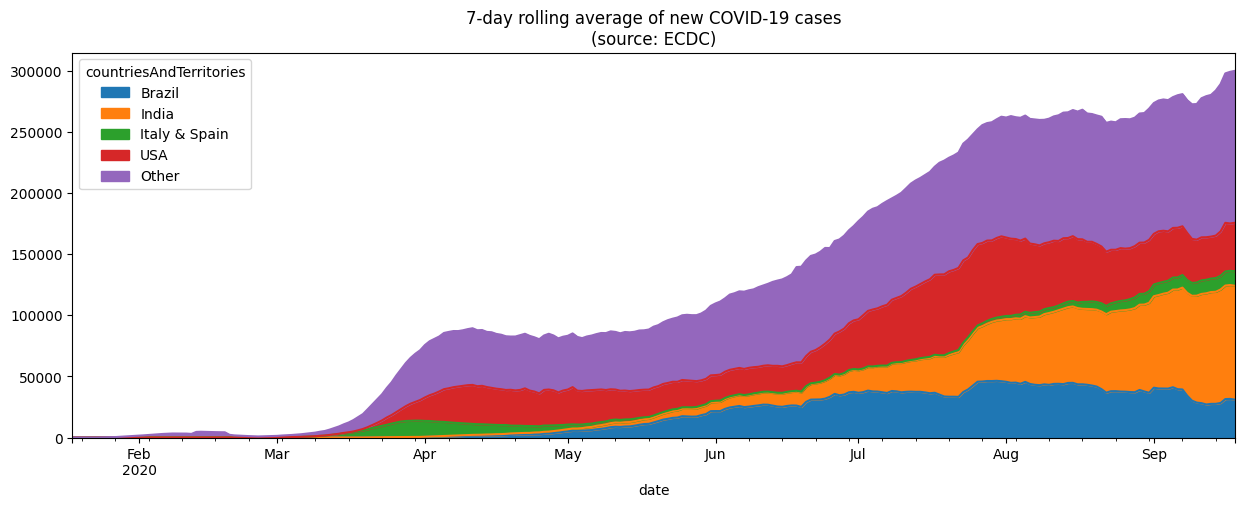

In [9]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

<Axes: xlabel='date'>

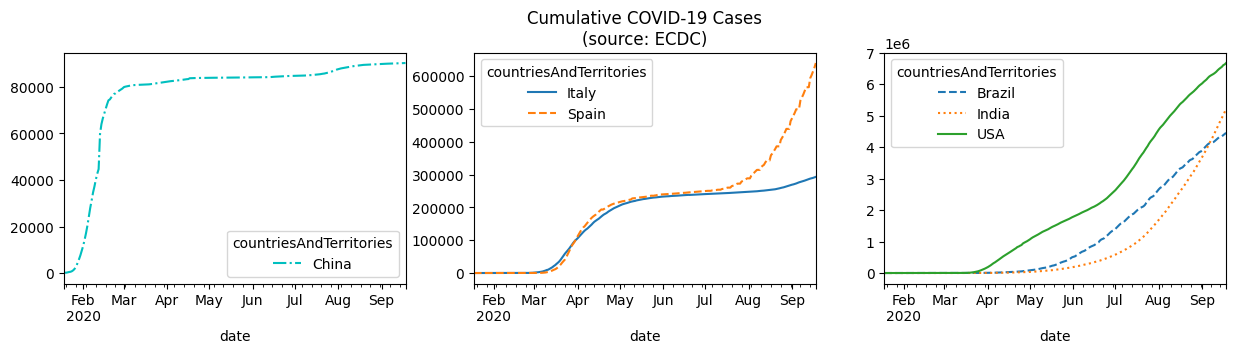

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

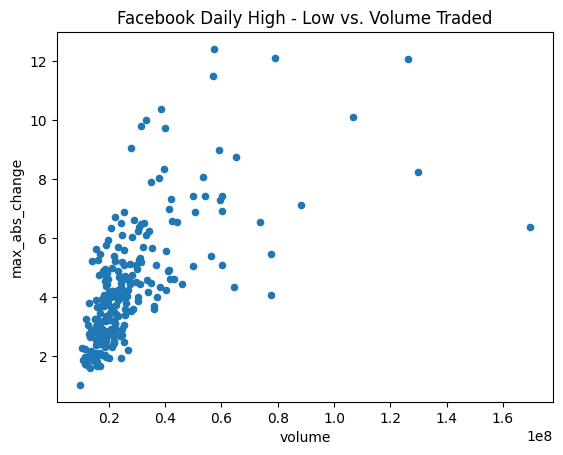

In [11]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

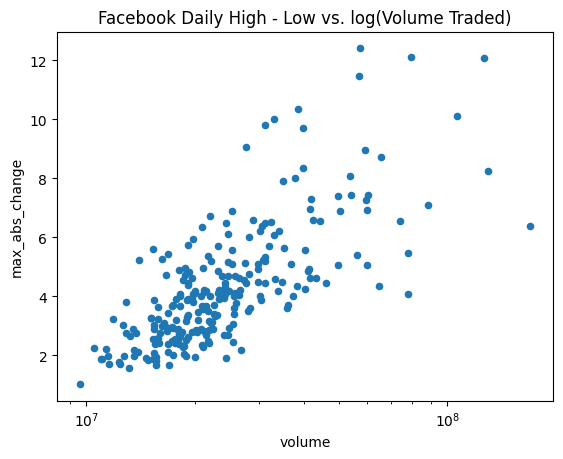

In [12]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

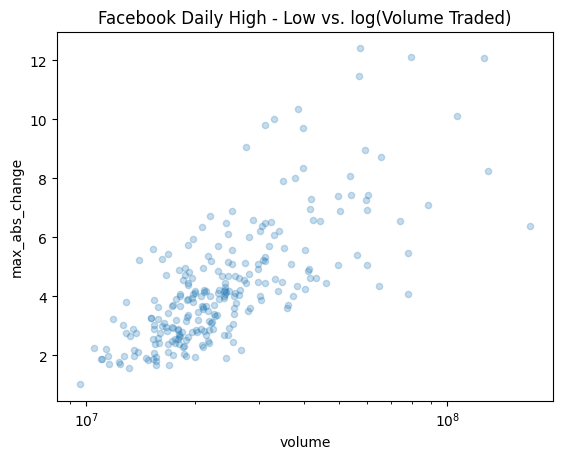

In [13]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

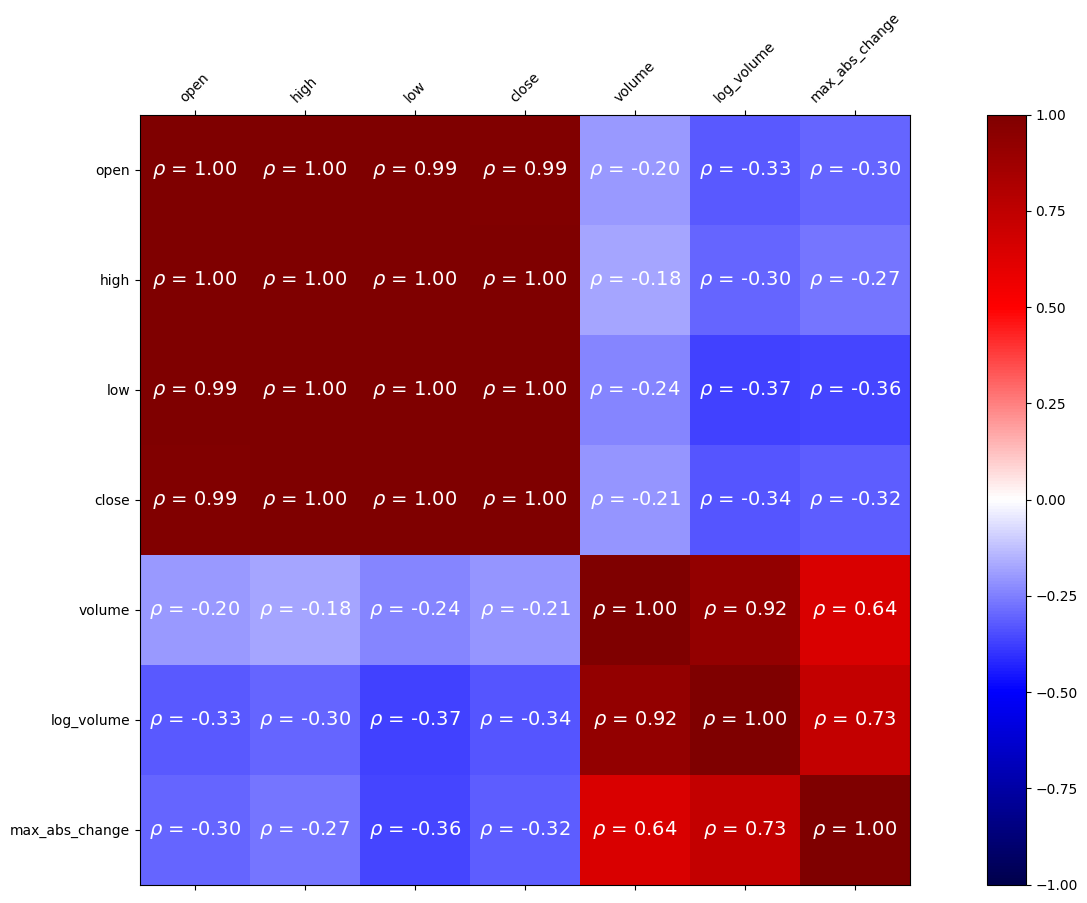

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

Text(0.5, 0, 'Volume traded')

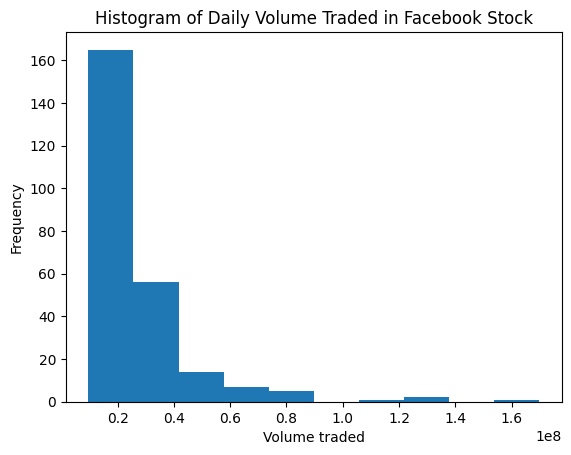

In [15]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'magnitude')

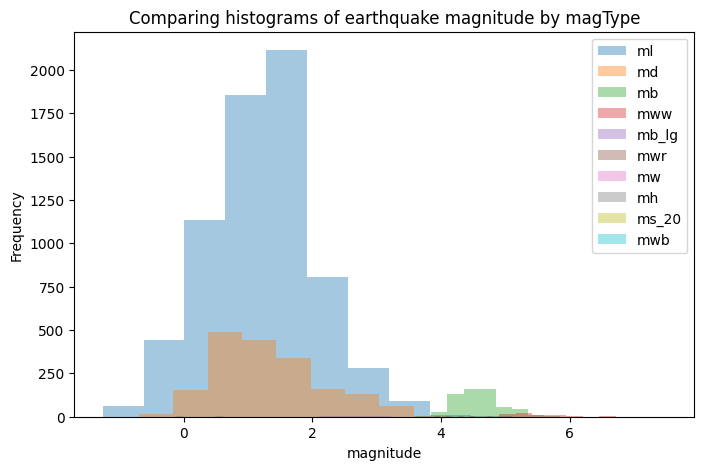

In [16]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

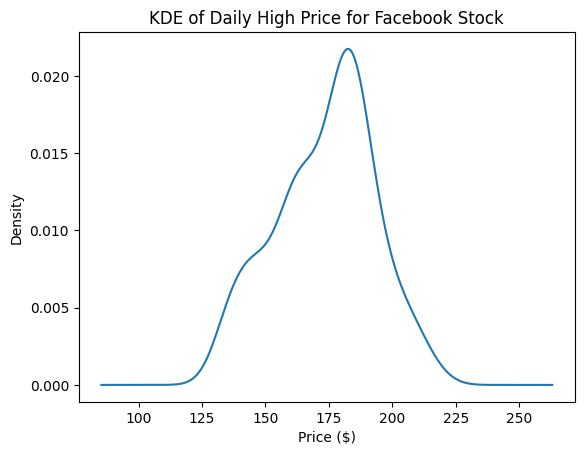

In [17]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

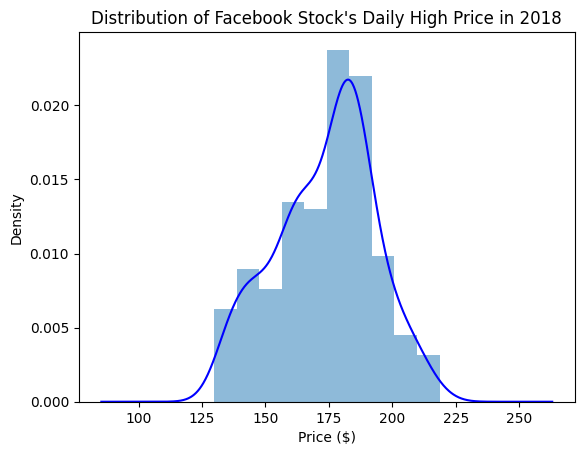

In [18]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

ModuleNotFoundError: No module named 'statsmodels'

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3 
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

ModuleNotFoundError: No module named 'statsmodels'

Text(0, 0.5, 'price ($)')

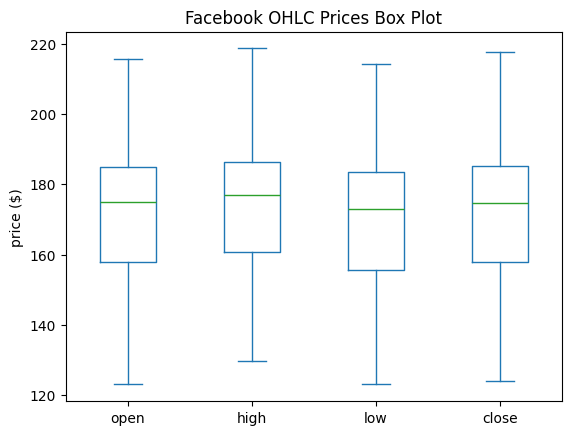

In [21]:

fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)

Text(0, 0.5, 'price ($)')

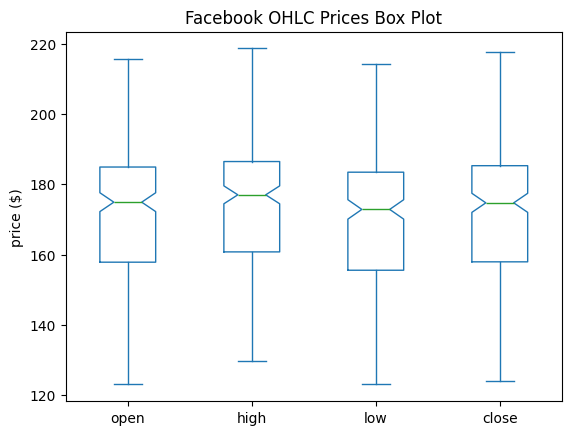

In [22]:

fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot', notch=True)
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)

C:\Users\sxf\AppData\Local\Temp\ipykernel_110024\321626264.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

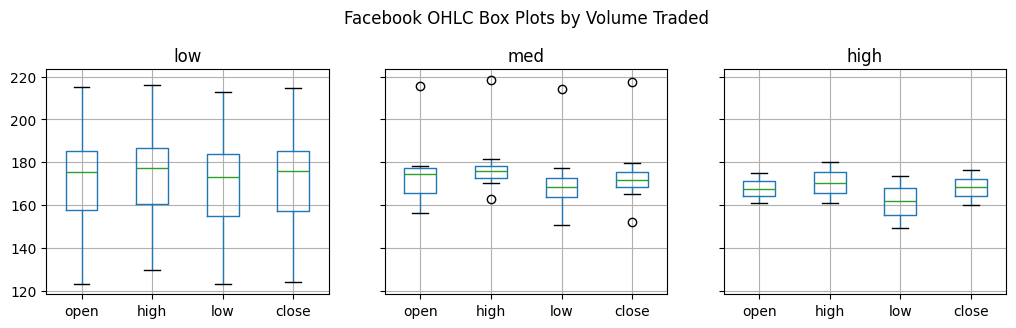

In [23]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

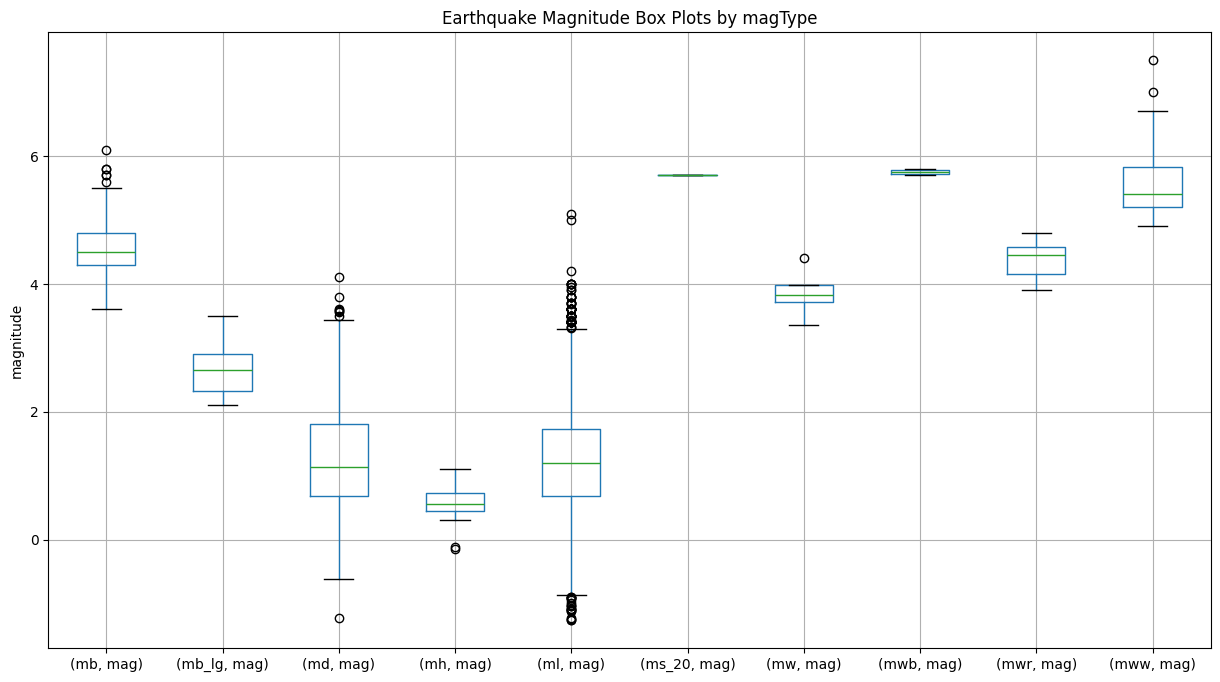

In [24]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

In [25]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

AttributeError: 'DataFrame' object has no attribute 'parsed_place'